In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
path = "/gdrive/My Drive/ML:March2020/data/"

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(font_scale=1.2)
%matplotlib inline

In [ ]:
recipes = pd.read_csv(path+'recipes_muffins_cupcake.csv')
recipes

,Type,Flour,Sugar
0,Muffin,55,3
1,Muffin,47,12
2,Muffin,47,18
3,Muffin,45,17
4,Muffin,50,12
5,Muffin,55,3
6,Muffin,54,7
7,Muffin,47,10
8,Muffin,50,17
9,Muffin,50,17


In [ ]:
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Sugar']

In [ ]:
from sklearn.preprocessing import LabelEncoder
recipe_type_encoder = LabelEncoder()
recipes['Type'] = recipe_type_encoder.fit_transform(recipes['Type'])
recipes.head()

,Type,Flour,Sugar
0,1,55,3
1,1,47,12
2,1,47,18
3,1,45,17
4,1,50,12


In [ ]:
x = recipes[['Flour','Sugar']]
x

,Flour,Sugar
0,55,3
1,47,12
2,47,18
3,45,17
4,50,12
5,55,3
6,54,7
7,47,10
8,50,17
9,50,17


In [ ]:
y=recipes["Type"]
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Type, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
theta_0 = model.intercept_[0]
print('theta 0 = {}'.format(theta_0))

theta 0 = -39.151240626209535


In [ ]:
theta=model.coef_[0]
print('theta 1 = {} , theta 2 = {}'.format(theta[0], theta[1]))

theta 1 = 0.9800068467133003 , theta 2 = -0.2086799629774002


In [ ]:
print('Min and Max of Sugar = {}, {}'.format(recipes['Sugar'].min(),recipes['Sugar'].max() ))
print('Min and Max of Flour = {}, {}'.format(recipes['Flour'].min(),recipes['Flour'].max()))

Min and Max of Sugar = 3, 31
Min and Max of Flour = 34, 55


In [ ]:
Flour_for_line = np.linspace(30, 60)
sugar_for_line = -(theta_0 + theta[0]*Flour_for_line)/theta[1]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 40.0)

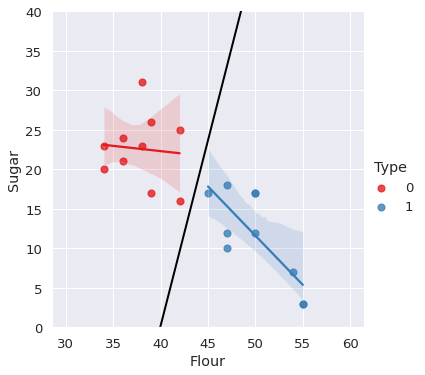

In [ ]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=True, scatter_kws={"s": 50})
plt.plot(Flour_for_line,sugar_for_line, linewidth=2, color='black')
plt.ylim(0, 40)

In [ ]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_theta_0 = svm_model.intercept_[0]
print('SVM theta 0 = {}'.format(svm_theta_0))

SVM theta 0 = -28.993497423663204


In [ ]:
svm_theta = svm_model.coef_[0]
print('SVM theta 1 = {}, theta 2 = {}'.format(svm_theta[0], svm_theta[1]))

SVM theta 1 = 0.6665372621624517, theta 2 = -4.852668907817659e-05


In [ ]:
flour_line = np.linspace((x['Flour'].min())-5,(x['Flour'].max())+5)
sugar_line = -(svm_theta_0 + svm_theta[0]*flour_line)/svm_theta[1]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 40.0)

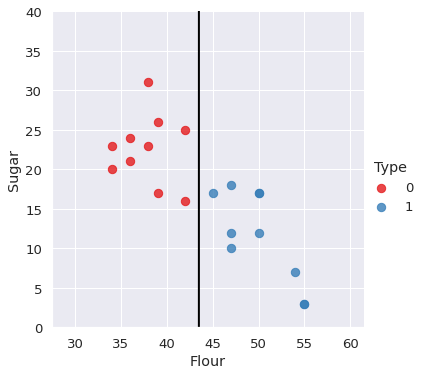

In [ ]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(flour_line, sugar_line, linewidth=2, color='black');
plt.ylim(0, 40)

In [ ]:
svm_model.support_

array([11, 15,  3], dtype=int32)

In [ ]:
svm_model.support_vectors_

array([[42., 16.],
       [42., 25.],
       [45., 17.]])

In [ ]:
svm_model.n_support_

array([2, 1], dtype=int32)

In [ ]:
def muffin_or_cupcake(Flour, Sugar):
    if(svm_model.predict([[Flour, Sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [ ]:
muffin_or_cupcake(50, 20)

You're looking at a cupcake recipe!


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 40.0)

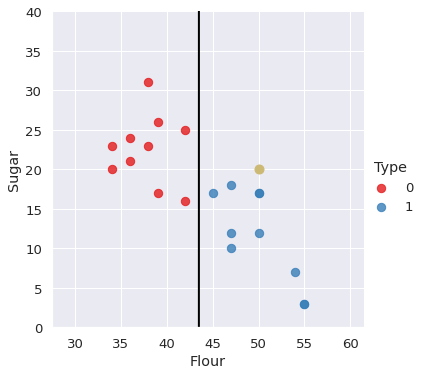

In [ ]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(flour_line, sugar_line, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');
plt.ylim(0,40)